# Comparison of GDP per capita among countries of Africa and Americas


**Anna Williford** <br>
_February 2018_

Adapted from a [lesson](https://github.com/AnnaWilliford/2017-02-04-UTA/blob/gh-pages/workshop/02_day/02_pm/demographic_analysis_report.ipynb) by Daren Card, November 2017

***

## Introduction

Gross Domestic Product (GDP) per capita is a country's income per person. To compare GDP per capita between the countries of Africa and Americas, I used gapminder dataset available at [GAPMINDER website](https://www.gapminder.org/data/ )

## Data analysis

I downloaded dataset `gapminder.txt` to `Data` folder in my working directory. I used Linux tools and Python to work with gapminder dataset. Linux command-line tools are very useful for simple manipulation of text files while Python is a great tool for data visualization. 


### Data overview 

My first step in the analysis of gapminder dataset is to know exactly what kind of data is available in the dataset.
Here are the Linux commands I used to examine my dataset.

>```bash
> #view first and last 5 records
> head Data/gapminder.txt
> tail Data/gapminder.txt

> #check if file is tab-delimited
> head Data/gapminder.txt | cat -T

> #how many countries are in my data?
> cut -f1 Data/gapminder.txt| grep -v 'country'| sort | uniq |wc -l

> #for what years do I have data?
> cut -f3 Data/gapminder.txt| grep -v 'year'|sort | uniq

> #Does every country has data for the same number of years?
> cut -f3 Data/gapminder.txt|grep -v 'year' |sort |uniq -c 
>```

The dataset contains information about life expectancy, population size and GDP per capita for 142 countries for 12 non-consecutive years ranging from 1952 to 2007.

### Analysis of GDP per capita 

Looks like my dataset is in a proper tabular format and is ready to be imported in Python. I used Python's [Pandas](https://pandas.pydata.org/) library to work with the dataset as a data frame object. To make plots, I use [plotnine](http://plotnine.readthedocs.io/en/stable/index.html) library that implements `ggplot2` package from R.

In [10]:
import plotnine
from plotnine import *
import pandas as pd

#read data into Python
myData=pd.read_table("Data/gapminder.txt")

#view first few lines of the dataset
print(myData.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


#### Analysis workflow

To compare GDP per capita between Africa and Americas, I implemented the following steps in Python.

1. Select rows with information about countries located in Africa or Americas
2. Create a data frame with mean values of GDP per capita for Africa and Americas
3. Create a barplot to visualize average GDP per capita
4. Overlay barplot with GDP per capita values averaged over all years for every country. This is done to visualize the variation in GDP per capita among different countries on each continent


#### Function definitions:

To implement the steps above, I define 3 functions:

In [11]:
def SelectDataByCont(df,continents_list):
    """select data for continents given in the 'continents_list' from a dataframe 'df'"""    
    dataSubset=myData.loc[df['continent'].isin(continents_list),:]
    return dataSubset

>**About this function** <br>
> Select rows where 'continent' is the continent name listed in the `continents_list`<br>
> If we are interested in data for a single continent, we can select it like this:
>```python
>myNewData=myData.loc[myData['continent']=='Africa',: ]

>#I can accomplish the same result using `.isin` selection method:
>contList=['Africa']
>myNewData=myData.loc[myData['continent'].isin(contList),: ]

>#And the same result using our function:
>myNewData=SelectDataByCont(myData,contList)
>```

>Why is it better to use `.isin` method?
>What if I want select rows with information about Africa and Americas?
>```python
>myNewData=myData.loc[(myData['continent']=='Africa') | (myData['continent']=='Americas'), :]

>#I can again accomplish the same result using `.isin` selection method- I only need to redefine the list of continents:
>contList=['Africa', 'Americas']
>myNewData=myData.loc[myData['continent'].isin(contList),: ]

>#And the same result by calling our function:
>myNewData=SelectDataByCont(myData,contList)
```
>Why to write a function instead of just using `isin` method multiple times?<br>
>Because if I want data for a new set of continents somewhere during my analysis, 
>I can just reuse the function and NOT write complicated expression multiple times
>

In [12]:
def GetMeansByCategory(df,groupby_list):
    """calculate the means of data from 'df' grouped by categories given in 'groupby_list' """   
    dataMeans=df.groupby(groupby_list, as_index=False).mean()
    return dataMeans 

>**About this function** <br>
>.groupby method is a very useful function that allows us to split the dataset by category of interest. <br>
>As an example, we can easily split our dataset by 'continent'
>```python
>groupedData=myNewData.groupby('continent', as_index=False)
>#groupedData is an obeject with our data grouped by 'continent'

>#We can now apply different functions to it
>groupedData_means=myNewData.groupby('continent', as_index=False).mean()
>groupedData_sums=myNewData.groupby('continent', as_index=False).sum()
>groupedData_count=myNewData.groupby('continent', as_index=False).count()

>#if we split by 2 categories, for example'continent' and 'country', we store them in lists
>groupedData_means=myNewData.groupby(['continent','country'], as_index=False).mean()

>#we obtain the same result with our function after defining a list of categories to split the data by
>groupBy=['continent', 'country']
>meansPerCont=GetMeansByCategory(myNewData,groupBy)
>```

In [13]:
def MakeBarPlot(df):
    """ make a barplot with data from 'df' """
    p=ggplot(df) + \
        aes(x = 'continent', y = 'gdpPercap', fill='continent') + \
        geom_bar(stat='stat_identity', color="grey") + \
        xlab('Continent') + \
        ylab('GDP per capita') +\
        ggtitle('GDP per capita: a comparison')         
    return p 


>**About this function** <br>
>This function makes a barplot. You can think of it as a function to make a base plot to which other layers can be added

## Results

**Step 1:** Select data for Asia and Americas

In [14]:
#make a list of continents to select
ToSelect=['Africa','Americas']

#call SelectDataByCont(df,continents_list) function
myNewData=SelectDataByCont(myData,ToSelect)

#check that myNewData only contains Africa and Americas
print(pd.unique(myNewData['continent']))


['Africa' 'Americas']


**Step 2:** Create dataframe with `gdpPercap` values averaged over all years for each continent

In [15]:
#define grouping variable as continent
groupBy=['continent']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)
print(myNewData_meanPerCont)         

  continent    year    lifeExp           pop    gdpPercap
0    Africa  1979.5  48.865330  9.916003e+06  2193.754578
1  Americas  1979.5  64.658737  2.450479e+07  7136.110356


**Step 3:** Create a barplot to visualize avergae GDP per capita for Asia and Americas

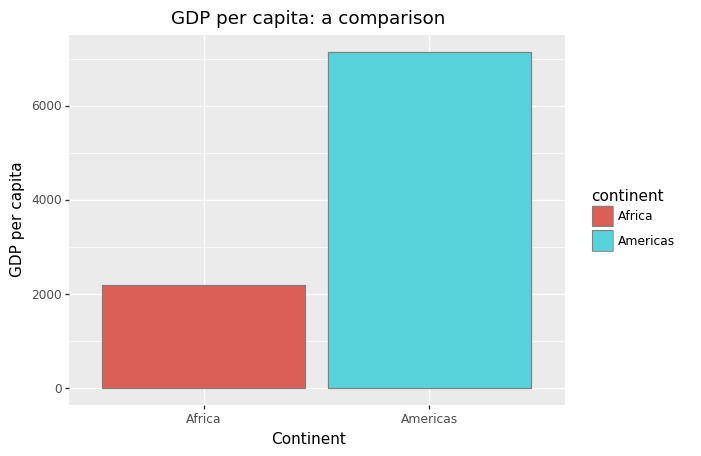

<ggplot: (94267930032)>


In [16]:
#call MakeBarPlot(df)
p=MakeBarPlot(myNewData_meanPerCont)
print(p)

**Step 4:** Overlay barplot with `gdpPercap` values averaged over all years for every country. 
- 4.1 Create a new dataset with  `gdpPercap` values averaged across all years for every country and continent

In [17]:
#get averages across years for every country, keeping continents in the dataframe
#define grouping categories
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)
print(myNewData_meanPerCountry.head())

  continent       country    year    lifeExp           pop    gdpPercap
0    Africa       Algeria  1979.5  59.030167  1.987541e+07  4426.025973
1    Africa        Angola  1979.5  37.883500  7.309390e+06  3607.100529
2    Africa         Benin  1979.5  48.779917  4.017497e+06  1155.395107
3    Africa      Botswana  1979.5  54.597500  9.711862e+05  5031.503557
4    Africa  Burkina_Faso  1979.5  44.694000  7.548677e+06   843.990665


- 4.2 Add averaged `gdpPercap` values per country to barplot

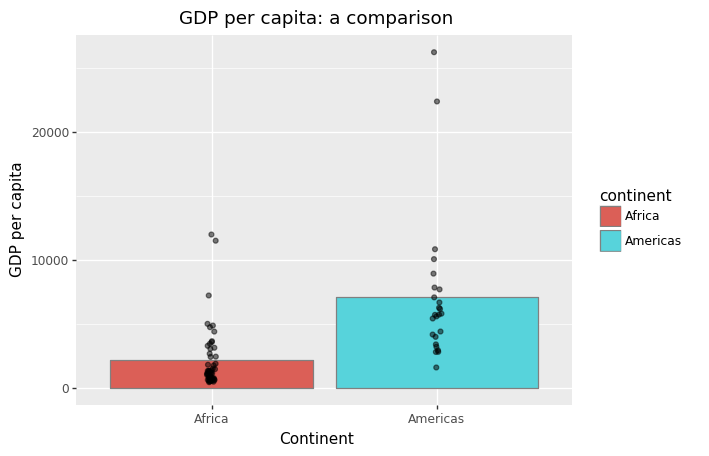

<ggplot: (94263466360)>

In [18]:
#p=MakeBarPlot(myNewData_meanPerCont) from Step 3

p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap'),fill='black', \
             position=position_jitter(width=0.02), alpha=0.5)

The final image can be saved as GDP_Africa_America.png with this command:
>```Python
>p1=p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap') )
>p1.save(filename="GDP_Africa_America.png", height=4, width=5, units = 'in')
>```

## Conclusion
There is a large variation in GDP per capita among countries of Africa and Americas. On average, American continents are about 3 times wealthier than Africa.